## Try to implement different Model on the dataset by using autogluon

Tips: 这部分的代码由于autogluon包比较大，所以如果想跑的话，需要等待它下载一会。如果不跑，可以看看下面notebook的成果。另外，可以在旁边的AutogluonProcess.py文件里跑，这样速度会更快。

Tips: This portion of the code requires downloading the autogluon package, which may take some time. If you wish to execute it, please be patient during the download process. Alternatively, you can review the results in the notebook below. Additionally, you can run the code in the adjacent AutogluonProcess.py file for faster execution.



## Running Preparation
**Needed Python Version:**
 <=3.11 (package autogluon can't support python 3.12!) 
 My computer runs well in 3.11

**Needed Package:**

* autogluon, version 1.1.0 (recommended)
* pandas
* warnings
* tensorboardX


## Autogluon Introduction:


作为数据科学的初学者，我们在机器学习中比较难确认哪种模型的适应度是最好的，而一点一点实践可能会花费我们许多时间。
而随着自动化机器学习 (AutoML) 的理念的提出，我们不用再亲自动手实践大部分水平较低的模型。自动化机器学习在对于同一个数据集上采用多个模型，如k-means，Random forest，随后比较每个模型的适应情况，方便我们之后的训练决策。

Amazon 的 AutoGluon AutoML 库就是基于以上自动化机器学习的理念而诞生。
该库由 Amazon Web Services (AWS) 在 re:invent 2019 上开源。使用 AutoGluon，我们可以训练最先进的机器学习模型，以进行图像分类、对象检测、文本分类和表格式数据预测。从笔记本电脑或工作站到功能强大的 Amazon Elastic Compute Cloud (Amazon EC2) – 实例，我们都可以使用该库，利用多核并行获得结果。

AWS 的 AutoGluon 团队发表了一篇论文，详细介绍了 AutoGluon-Tabular 的内部工作原理，这是一种开源 AutoGluon 功能，允许我们对来自电子表格和数据库表格等来源的表格数据集的机器学习模型进行训练。

As beginners in data science, it can be challenging to determine which model best fits our needs in machine learning, and manually experimenting with various models can consume a significant amount of time. However, with the emergence of the concept of Automated Machine Learning (AutoML), we no longer need to personally implement many low-level models. AutoML automates the process of trying multiple models, such as k-means and Random Forest, on the same dataset, and then compares the performance of each model, facilitating our training decisions.
Amazon's AutoGluon AutoML library is born out of this idea of automated machine learning. The library was open-sourced by Amazon Web Services (AWS) at re:Invent 2019. With AutoGluon, we can train state-of-the-art machine learning models for tasks like image classification, object detection, text classification, and tabular data prediction. From laptops or workstations to powerful Amazon Elastic Compute Cloud (Amazon EC2) instances, this library can be utilized, leveraging multi-core parallelism to achieve results.
The AutoGluon team at AWS has published a paper detailing the inner workings of AutoGluon-Tabular, an open-source AutoGluon feature that allows us to train machine learning models on tabular datasets sourced from spreadsheets and database tables.

![Article from Amazon](Img/imgAWSAutogluon.png "AWS")

Reference:
https://arxiv.org/abs/2003.06505
https://aws.amazon.com/cn/blogs/china/machine-learning-with-autogluon-an-open-source-automl-library/

In [60]:
import autogluon as ag
import pandas as pd
from autogluon.tabular import TabularDataset
from tensorboardX import SummaryWriter
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np


## Data Preprocessing:
Autogluon will automatically train the input data as a whole csv just like excel. To meet its requirement, we need to add trainlabel.csv's col into traindata.csv

In [61]:
# 读取 train.csv 文件
train_df = pd.read_csv("data/traindata.csv")
# 读取 data.csv 文件，假设数据列名为 'income'
data_df = pd.read_csv("data/trainlabel.csv")

# 将 'income' 数据列添加到 train_df 中
train_df['Income'] = data_df['Income']

# 将修改后的 train_df 保存为新的 CSV 文件
train_df.to_csv("data/traindata1.csv", index=False)
train_df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,Income
0,77,Local-gov,177550,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,White,Male,3818,0,14,United-States,0
1,40,Self-emp-inc,475322,Bachelors,13,Separated,Craft-repair,Own-child,White,Male,0,0,50,United-States,0
2,29,Self-emp-not-inc,341672,HS-grad,9,Married-spouse-absent,Transport-moving,Other-relative,Asian-Pac-Islander,Male,0,1564,50,India,1
3,41,Private,184378,HS-grad,9,Separated,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,0
4,22,Private,306967,Some-college,10,Never-married,Adm-clerical,Not-in-family,White,Female,0,0,25,United-States,0


## Loading the saving data using pandas

In [62]:
# loading
train_data = pd.read_csv('data/traindata1.csv')
test_data = pd.read_csv('data/testdata.csv')

label_column = 'Income'
test_data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,71,Private,157909,Some-college,10,Never-married,Other-service,Not-in-family,White,Female,2964,0,60,United-States
1,34,Private,226443,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,55,United-States
2,36,Private,311255,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0,0,40,Haiti
3,32,Private,229732,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States
4,20,Private,212582,Some-college,10,Never-married,Other-service,Own-child,White,Female,0,0,16,United-States


## Training using Autogluon tabular 

In [63]:
# training
predictor = ag.tabular.TabularPredictor(label=label_column, problem_type='binary', verbosity=4)
# , visualizer='tensorboard'

No path specified. Models will be saved in: "AutogluonModels\ag-20240607_103356"


## Model Fitting

Within the call to fit(), AutoGluon automatically: preprocesses the raw data, identifies what type of prediction problem this is (binary, multi-class classification or regression), partitions the data into various folds for model-training and validation, individually fits various models, and finally creates an optimized model ensemble that outperforms any ofthe individual trained models. For users willing to tolerate longer training times to maximize predictive accuracy,fit() provides additional options that may be specified:



* hyperparameter tune = True optimizes the hyperparameters of the individual models.
* auto stack = True adaptively chooses a model ensembling strategy based on bootstrap aggregation(bagging) and (multi-layer) stacking.
* time limits controls the runtime of fit().
* eval metric specifies the metric used to evaluate predictive performance.


We use a bespoke set of models in a predefined order. This ensures that reliably performant models such as random forests are trained prior to more expensive and less reliable models such as k-nearest neighbors.

![Model network choosing](Img/ModelAuto.png "AWS")

The network architecture used by AutoGluon is depicted in the following Figure, and additional details are in github. It shares similar design choices as the models of Howard &Gugger (2020); Cheng et al. (2016). Our network applies a separate embedding layer to each categorical feature, where the embedding dimension is selected proportionally to the number of unique levels observed for this feature (Guo & Berkhahn, 2016). For multivariate data, the individual embedding layers enable our network to separately learn about each categorical feature before its representation is blended with other variables. The embeddings of categorical features are concatenated with the numerical features into a large vector which is both fed into a 3-layer feedforward network as well as directly connected to the output predictions via a linear skip-connection.

![Architecture of AutoGluon’s neural network](Img/AutoPrinciple.png "AWS")


注意：下面这一行的输出如果是红色的，并不一定是报错！而是Autogluon的系统输出。但是如果明确指明是error，有可能是：
1.输入的csv文件格式问题
2.包安装版本问题，这里我的包版本为1.1.0


Notice: the next python line **fit** the model and output lines about XGBoost's running model. 
the red line output may be the information of them rather than error.

In [64]:
predictor.fit(train_data=train_data)

No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
============ fit kwarg info ============
User Specified kwargs:
{}
Full kwargs:
{'_feature_generator_kwargs': None,
 '_save_bag_folds': None,
 'ag_args': None,
 'ag_args_ensemble': None,
 'ag_args_fit': None,
 'auto_stack': False,
 'calibrate': 'auto',
 'ds_args': {'clean_up_fits': True,
             'detection_time_frac': 0.25,
             'holdout_data': None,
             'holdout_frac': 0.1111111111111111

[1]	valid_set's binary_error: 0.240789
[2]	valid_set's binary_error: 0.240789
[3]	valid_set's binary_error: 0.240789
[4]	valid_set's binary_error: 0.240789
[5]	valid_set's binary_error: 0.240789
[6]	valid_set's binary_error: 0.240789
[7]	valid_set's binary_error: 0.240789
[8]	valid_set's binary_error: 0.240789
[9]	valid_set's binary_error: 0.224561
[10]	valid_set's binary_error: 0.216667
[11]	valid_set's binary_error: 0.212719
[12]	valid_set's binary_error: 0.201754
[13]	valid_set's binary_error: 0.199561
[14]	valid_set's binary_error: 0.194737
[15]	valid_set's binary_error: 0.19386
[16]	valid_set's binary_error: 0.167544
[17]	valid_set's binary_error: 0.160526
[18]	valid_set's binary_error: 0.159211
[19]	valid_set's binary_error: 0.156579
[20]	valid_set's binary_error: 0.15614
[21]	valid_set's binary_error: 0.155263
[22]	valid_set's binary_error: 0.152193
[23]	valid_set's binary_error: 0.150877
[24]	valid_set's binary_error: 0.151316
[25]	valid_set's binary_error: 0.15
[26]	valid_set'

Saving AutogluonModels\ag-20240607_103356\models\LightGBMXT\model.pkl
Saving AutogluonModels\ag-20240607_103356\utils\attr\LightGBMXT\y_pred_proba_val.pkl
	0.8737	 = Validation score   (accuracy)
	1.69s	 = Training   runtime
	0.01s	 = Validation runtime
Saving AutogluonModels\ag-20240607_103356\models\trainer.pkl
Fitting model: LightGBM ...
	Dropped 0 of 14 features.
	Fitting LightGBM with 'num_gpus': 0, 'num_cpus': 4
	Fitting 10000 rounds... Hyperparameters: {'learning_rate': 0.05}


[202]	valid_set's binary_error: 0.130263
[203]	valid_set's binary_error: 0.130263
[204]	valid_set's binary_error: 0.128947
[205]	valid_set's binary_error: 0.128947
[206]	valid_set's binary_error: 0.129386
[207]	valid_set's binary_error: 0.129386
[208]	valid_set's binary_error: 0.129386
[209]	valid_set's binary_error: 0.129386
[210]	valid_set's binary_error: 0.128947
[211]	valid_set's binary_error: 0.128947
[212]	valid_set's binary_error: 0.128947
[213]	valid_set's binary_error: 0.128947
[214]	valid_set's binary_error: 0.128947
[215]	valid_set's binary_error: 0.128947
[216]	valid_set's binary_error: 0.128947
[217]	valid_set's binary_error: 0.128947
[218]	valid_set's binary_error: 0.128947
[219]	valid_set's binary_error: 0.129386
[220]	valid_set's binary_error: 0.129825
[221]	valid_set's binary_error: 0.129825
[222]	valid_set's binary_error: 0.129825
[223]	valid_set's binary_error: 0.129825
[224]	valid_set's binary_error: 0.129825
[225]	valid_set's binary_error: 0.129825
[226]	valid_set'

Saving AutogluonModels\ag-20240607_103356\models\LightGBM\model.pkl
Saving AutogluonModels\ag-20240607_103356\utils\attr\LightGBM\y_pred_proba_val.pkl
	0.8794	 = Validation score   (accuracy)
	0.76s	 = Training   runtime
	0.01s	 = Validation runtime
Saving AutogluonModels\ag-20240607_103356\models\trainer.pkl
Fitting model: RandomForestGini ...
	Dropped 0 of 14 features.
	Fitting RandomForestGini with 'num_gpus': 0, 'num_cpus': 8


[218]	valid_set's binary_error: 0.121053
[219]	valid_set's binary_error: 0.121053
[220]	valid_set's binary_error: 0.121053
[221]	valid_set's binary_error: 0.121053
[222]	valid_set's binary_error: 0.121491
[223]	valid_set's binary_error: 0.121491
[224]	valid_set's binary_error: 0.12193
[225]	valid_set's binary_error: 0.121053
[226]	valid_set's binary_error: 0.121053
[227]	valid_set's binary_error: 0.121053
[228]	valid_set's binary_error: 0.121053
[229]	valid_set's binary_error: 0.121053
[230]	valid_set's binary_error: 0.121053
[231]	valid_set's binary_error: 0.121053
[232]	valid_set's binary_error: 0.120614
[233]	valid_set's binary_error: 0.121053
[234]	valid_set's binary_error: 0.120614
[235]	valid_set's binary_error: 0.121053
[236]	valid_set's binary_error: 0.121053
[237]	valid_set's binary_error: 0.121053
[238]	valid_set's binary_error: 0.121053
[239]	valid_set's binary_error: 0.121491
[240]	valid_set's binary_error: 0.121491
[241]	valid_set's binary_error: 0.12193
[242]	valid_set's 

Saving AutogluonModels\ag-20240607_103356\models\RandomForestGini\model.pkl
Saving AutogluonModels\ag-20240607_103356\utils\attr\RandomForestGini\y_pred_proba_val.pkl
	0.8658	 = Validation score   (accuracy)
	1.86s	 = Training   runtime
	0.06s	 = Validation runtime
Saving AutogluonModels\ag-20240607_103356\models\trainer.pkl
Fitting model: RandomForestEntr ...
	Dropped 0 of 14 features.
	Fitting RandomForestEntr with 'num_gpus': 0, 'num_cpus': 8
Saving AutogluonModels\ag-20240607_103356\models\RandomForestEntr\model.pkl
Saving AutogluonModels\ag-20240607_103356\utils\attr\RandomForestEntr\y_pred_proba_val.pkl
	0.8645	 = Validation score   (accuracy)
	1.65s	 = Training   runtime
	0.06s	 = Validation runtime
Saving AutogluonModels\ag-20240607_103356\models\trainer.pkl
Fitting model: CatBoost ...
	Dropped 0 of 14 features.
	Fitting CatBoost with 'num_gpus': 0, 'num_cpus': 4
	Catboost model hyperparameters: {'iterations': 10000, 'learning_rate': 0.05, 'random_seed': 0, 'allow_writing_files

0:	learn: 0.8431162	test: 0.8399123	best: 0.8399123 (0)	total: 62.1ms	remaining: 10m 20s
1:	learn: 0.8475527	test: 0.8456140	best: 0.8456140 (1)	total: 126ms	remaining: 10m 31s
2:	learn: 0.8456513	test: 0.8456140	best: 0.8456140 (1)	total: 180ms	remaining: 9m 58s
3:	learn: 0.8458951	test: 0.8438596	best: 0.8456140 (1)	total: 248ms	remaining: 10m 18s
4:	learn: 0.8450176	test: 0.8442982	best: 0.8456140 (1)	total: 330ms	remaining: 11m
5:	learn: 0.8447738	test: 0.8429825	best: 0.8456140 (1)	total: 408ms	remaining: 11m 19s
6:	learn: 0.8492102	test: 0.8464912	best: 0.8464912 (6)	total: 476ms	remaining: 11m 19s
7:	learn: 0.8505265	test: 0.8495614	best: 0.8495614 (7)	total: 542ms	remaining: 11m 16s
8:	learn: 0.8510628	test: 0.8513158	best: 0.8513158 (8)	total: 611ms	remaining: 11m 18s
9:	learn: 0.8522328	test: 0.8513158	best: 0.8513158 (8)	total: 674ms	remaining: 11m 12s
10:	learn: 0.8525254	test: 0.8517544	best: 0.8517544 (10)	total: 738ms	remaining: 11m 9s
11:	learn: 0.8529641	test: 0.852193

Saving AutogluonModels\ag-20240607_103356\models\CatBoost\model.pkl
Saving AutogluonModels\ag-20240607_103356\utils\attr\CatBoost\y_pred_proba_val.pkl
	0.8811	 = Validation score   (accuracy)
	37.39s	 = Training   runtime
	0.01s	 = Validation runtime
Saving AutogluonModels\ag-20240607_103356\models\trainer.pkl
Fitting model: ExtraTreesGini ...
	Dropped 0 of 14 features.
	Fitting ExtraTreesGini with 'num_gpus': 0, 'num_cpus': 8
Saving AutogluonModels\ag-20240607_103356\models\ExtraTreesGini\model.pkl
Saving AutogluonModels\ag-20240607_103356\utils\attr\ExtraTreesGini\y_pred_proba_val.pkl
	0.8588	 = Validation score   (accuracy)
	1.01s	 = Training   runtime
	0.06s	 = Validation runtime
Saving AutogluonModels\ag-20240607_103356\models\trainer.pkl
Fitting model: ExtraTreesEntr ...
	Dropped 0 of 14 features.
	Fitting ExtraTreesEntr with 'num_gpus': 0, 'num_cpus': 8
Saving AutogluonModels\ag-20240607_103356\models\ExtraTreesEntr\model.pkl
Saving AutogluonModels\ag-20240607_103356\utils\attr\

[0]	validation_0-error:0.24079
[1]	validation_0-error:0.24079
[2]	validation_0-error:0.24079
[3]	validation_0-error:0.18947
[4]	validation_0-error:0.18947
[5]	validation_0-error:0.18860
[6]	validation_0-error:0.18640
[7]	validation_0-error:0.16886
[8]	validation_0-error:0.14868
[9]	validation_0-error:0.14561
[10]	validation_0-error:0.14649
[11]	validation_0-error:0.14605
[12]	validation_0-error:0.14518
[13]	validation_0-error:0.14123
[14]	validation_0-error:0.13772
[15]	validation_0-error:0.13728
[16]	validation_0-error:0.13728
[17]	validation_0-error:0.13421
[18]	validation_0-error:0.13202
[19]	validation_0-error:0.13158
[20]	validation_0-error:0.13158
[21]	validation_0-error:0.13158
[22]	validation_0-error:0.13070
[23]	validation_0-error:0.13114
[24]	validation_0-error:0.13026
[25]	validation_0-error:0.13026
[26]	validation_0-error:0.12939
[27]	validation_0-error:0.12982
[28]	validation_0-error:0.12982
[29]	validation_0-error:0.12895
[30]	validation_0-error:0.12895
[31]	validation_0-

Saving AutogluonModels\ag-20240607_103356\models\XGBoost\model.pkl
Saving AutogluonModels\ag-20240607_103356\utils\attr\XGBoost\y_pred_proba_val.pkl
	0.8868	 = Validation score   (accuracy)
	1.87s	 = Training   runtime
	0.02s	 = Validation runtime
Saving AutogluonModels\ag-20240607_103356\models\trainer.pkl
Fitting model: NeuralNetTorch ...
	Dropped 0 of 14 features.
	Fitting NeuralNetTorch with 'num_gpus': 0, 'num_cpus': 4
Tabular Neural Network treats features as the following types:
{
    "continuous": [
        "age",
        "education.num",
        "hours.per.week"
    ],
    "skewed": [
        "fnlwgt",
        "capital.gain",
        "capital.loss"
    ],
    "onehot": [],
    "embed": [
        "workclass",
        "education",
        "marital.status",
        "occupation",
        "relationship",
        "race",
        "native.country"
    ],
    "language": [],
    "bool": [
        "sex"
    ]
}


Training data for TabularNeuralNetTorchModel has: 20512 examples, 14 featu

[1]	valid_set's binary_error: 0.240789
[2]	valid_set's binary_error: 0.240789
[3]	valid_set's binary_error: 0.240789
[4]	valid_set's binary_error: 0.240789
[5]	valid_set's binary_error: 0.240789
[6]	valid_set's binary_error: 0.240789
[7]	valid_set's binary_error: 0.240789
[8]	valid_set's binary_error: 0.240789
[9]	valid_set's binary_error: 0.240789
[10]	valid_set's binary_error: 0.240789
[11]	valid_set's binary_error: 0.240789
[12]	valid_set's binary_error: 0.240789
[13]	valid_set's binary_error: 0.240789
[14]	valid_set's binary_error: 0.234211
[15]	valid_set's binary_error: 0.20614
[16]	valid_set's binary_error: 0.198246
[17]	valid_set's binary_error: 0.193421
[18]	valid_set's binary_error: 0.186404
[19]	valid_set's binary_error: 0.181579
[20]	valid_set's binary_error: 0.175439
[21]	valid_set's binary_error: 0.167105
[22]	valid_set's binary_error: 0.164474
[23]	valid_set's binary_error: 0.158333
[24]	valid_set's binary_error: 0.154825
[25]	valid_set's binary_error: 0.145175
[26]	valid

Saving AutogluonModels\ag-20240607_103356\models\LightGBMLarge\model.pkl
Saving AutogluonModels\ag-20240607_103356\utils\attr\LightGBMLarge\y_pred_proba_val.pkl
	0.8754	 = Validation score   (accuracy)
	1.06s	 = Training   runtime
	0.01s	 = Validation runtime
Saving AutogluonModels\ag-20240607_103356\models\trainer.pkl
Loading: AutogluonModels\ag-20240607_103356\utils\attr\NeuralNetFastAI\y_pred_proba_val.pkl
Loading: AutogluonModels\ag-20240607_103356\utils\attr\LightGBM\y_pred_proba_val.pkl
Loading: AutogluonModels\ag-20240607_103356\utils\attr\KNeighborsUnif\y_pred_proba_val.pkl
Loading: AutogluonModels\ag-20240607_103356\utils\attr\RandomForestGini\y_pred_proba_val.pkl
Loading: AutogluonModels\ag-20240607_103356\utils\attr\XGBoost\y_pred_proba_val.pkl
Loading: AutogluonModels\ag-20240607_103356\utils\attr\RandomForestEntr\y_pred_proba_val.pkl
Loading: AutogluonModels\ag-20240607_103356\utils\attr\NeuralNetTorch\y_pred_proba_val.pkl
Loading: AutogluonModels\ag-20240607_103356\utils\

[172]	valid_set's binary_error: 0.126316
[173]	valid_set's binary_error: 0.126754
[174]	valid_set's binary_error: 0.126754
[175]	valid_set's binary_error: 0.126754
[176]	valid_set's binary_error: 0.126754
[177]	valid_set's binary_error: 0.126754
[178]	valid_set's binary_error: 0.126316
[179]	valid_set's binary_error: 0.126316
[180]	valid_set's binary_error: 0.126316
[181]	valid_set's binary_error: 0.126316
[182]	valid_set's binary_error: 0.126754
[183]	valid_set's binary_error: 0.127193
[184]	valid_set's binary_error: 0.127632
[185]	valid_set's binary_error: 0.12807
[186]	valid_set's binary_error: 0.12807
[187]	valid_set's binary_error: 0.127632
[188]	valid_set's binary_error: 0.12807
[189]	valid_set's binary_error: 0.127193
[190]	valid_set's binary_error: 0.127632
[191]	valid_set's binary_error: 0.127632
[192]	valid_set's binary_error: 0.12807
[193]	valid_set's binary_error: 0.127632
[194]	valid_set's binary_error: 0.127632
[195]	valid_set's binary_error: 0.128509
[196]	valid_set's bi

Loading: AutogluonModels\ag-20240607_103356\utils\attr\KNeighborsDist\y_pred_proba_val.pkl
Model configs that will be trained (in order):
	WeightedEnsemble_L2: 	{'ag_args': {'valid_base': False, 'name_bag_suffix': '', 'model_type': <class 'autogluon.core.models.greedy_ensemble.greedy_weighted_ensemble_model.GreedyWeightedEnsembleModel'>, 'priority': 0}, 'ag_args_ensemble': {'save_bag_folds': True}}
Fitting model: WeightedEnsemble_L2 ...
	Dropped 0 of 13 features.
	Dropped 0 of 13 features.
	Fitting WeightedEnsemble_L2 with 'num_gpus': 0, 'num_cpus': 8
Saving AutogluonModels\ag-20240607_103356\models\WeightedEnsemble_L2\utils\model_template.pkl
Loading: AutogluonModels\ag-20240607_103356\models\WeightedEnsemble_L2\utils\model_template.pkl
	Dropped 0 of 13 features.
Ensemble size: 1
Ensemble indices: [10]
Ensemble weights: 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
Saving AutogluonModels\ag-20240607_103356\models\WeightedEnsemble_L2\utils\oof.pkl
Saving AutogluonModels\ag-20240607_103356\

## Model Predicting

In any of these results, it is evident that AutoGluon is significantly more accurate than all of the other AutoML frameworks. For every benchmark and every time limit, AutoGluon is the only framework to rank better than 2nd on average, indicating no other framework could beat it consistently.

![Benckmark of the predict ability of AutoGluon](Img/AutoBenchmark.png "AWS")

Performance of AutoML frameworks relative to AutoGluon on the AutoML Benchmark (with 1h training time). 
(B)Proportion of teams in each Kaggle competition whose scores were beat by each AutoML framework (with 4h training time). Failed runs are not shown in these plots (and we omit a massive loss of Auto-WEKA on cars as an outlier). The color of each dataset name indicates the task: binary classification (black), multi-class classification (purple), regression (orange).

### So next we will try to output the prediction of Autogluon:

In [65]:
# predicting
performance = predictor.predict(test_data)
# print
print(performance)

# 将 performance 数据转换为 pandas 数据框
performance_df = pd.DataFrame(performance, columns=['prediction'])

# 保存为 CSV 文件
performance_df.to_csv('performance.csv', index=False)

Loading: AutogluonModels\ag-20240607_103356\models\XGBoost\model.pkl
Loading: AutogluonModels\ag-20240607_103356\models\WeightedEnsemble_L2\model.pkl


0       0
1       1
2       0
3       1
4       0
       ..
9764    0
9765    0
9766    1
9767    0
9768    0
Name: Income, Length: 9769, dtype: int64


## Predict Result
the predictor will find all the model and make a summary for them in score val, eval metric, running time etc.

![Predict summary of each model in AutoGluon](Img/ModelSum.png "AWS")

In [66]:
results = predictor.fit_summary(show_plot=True)

Loading: AutogluonModels\ag-20240607_103356\models\KNeighborsUnif\model.pkl
Loading: AutogluonModels\ag-20240607_103356\models\KNeighborsDist\model.pkl
Loading: AutogluonModels\ag-20240607_103356\models\LightGBMXT\model.pkl
Loading: AutogluonModels\ag-20240607_103356\models\LightGBM\model.pkl
Loading: AutogluonModels\ag-20240607_103356\models\RandomForestGini\model.pkl
Loading: AutogluonModels\ag-20240607_103356\models\RandomForestEntr\model.pkl
Loading: AutogluonModels\ag-20240607_103356\models\CatBoost\model.pkl
Loading: AutogluonModels\ag-20240607_103356\models\ExtraTreesGini\model.pkl
Loading: AutogluonModels\ag-20240607_103356\models\ExtraTreesEntr\model.pkl
Loading: AutogluonModels\ag-20240607_103356\models\NeuralNetFastAI\model.pkl
Loading: AutogluonModels\ag-20240607_103356\models\NeuralNetFastAImodel-internals.pkl
Loading: AutogluonModels\ag-20240607_103356\models\XGBoost\model.pkl
Loading: AutogluonModels\ag-20240607_103356\models\NeuralNetTorch\model.pkl
Loading: AutogluonMo

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val eval_metric  pred_time_val   fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0               XGBoost   0.886842    accuracy       0.016886   1.871613                0.016886           1.871613            1       True         11
1   WeightedEnsemble_L2   0.886842    accuracy       0.019397   2.037520                0.002512           0.165907            2       True         14
2              CatBoost   0.881140    accuracy       0.008536  37.387787                0.008536          37.387787            1       True          7
3              LightGBM   0.879386    accuracy       0.009497   0.756370                0.009497           0.756370            1       True          4
4         LightGBMLarge   0.875439    accuracy       0.007004   1.063512                0.007004           1.063512            1       True         13
5            LightGBMXT   0.8736

### Short Summary of the 14 model

In [67]:
lboard = predictor.leaderboard() 
print(lboard)

                  model  score_val eval_metric  pred_time_val   fit_time  \
0               XGBoost   0.886842    accuracy       0.016886   1.871613   
1   WeightedEnsemble_L2   0.886842    accuracy       0.019397   2.037520   
2              CatBoost   0.881140    accuracy       0.008536  37.387787   
3              LightGBM   0.879386    accuracy       0.009497   0.756370   
4         LightGBMLarge   0.875439    accuracy       0.007004   1.063512   
5            LightGBMXT   0.873684    accuracy       0.009517   1.694984   
6      RandomForestGini   0.865789    accuracy       0.059921   1.859524   
7       NeuralNetFastAI   0.865351    accuracy       0.040151  21.448709   
8      RandomForestEntr   0.864474    accuracy       0.060418   1.650244   
9        NeuralNetTorch   0.864035    accuracy       0.023515  38.527137   
10       ExtraTreesGini   0.858772    accuracy       0.060307   1.007755   
11       ExtraTreesEntr   0.857895    accuracy       0.060749   1.020350   
12       KNe

## Predict Model Comparison 

Here we get each of the model ability:

![Predict score of each model in AutoGluon](Img/ModelAbility.png "AWS")

So by introducing AutoGluon-Tabular, an AutoML framework for structured data that automatically manages the end-to-end ML pipeline. We can codifies best modeling practices from the data science community, and extends them in various ways. Key aspects of AutoGluon-Tabular include its robust data processing to handle this datasets. And we can have powerful model ensembling for our comparison need.

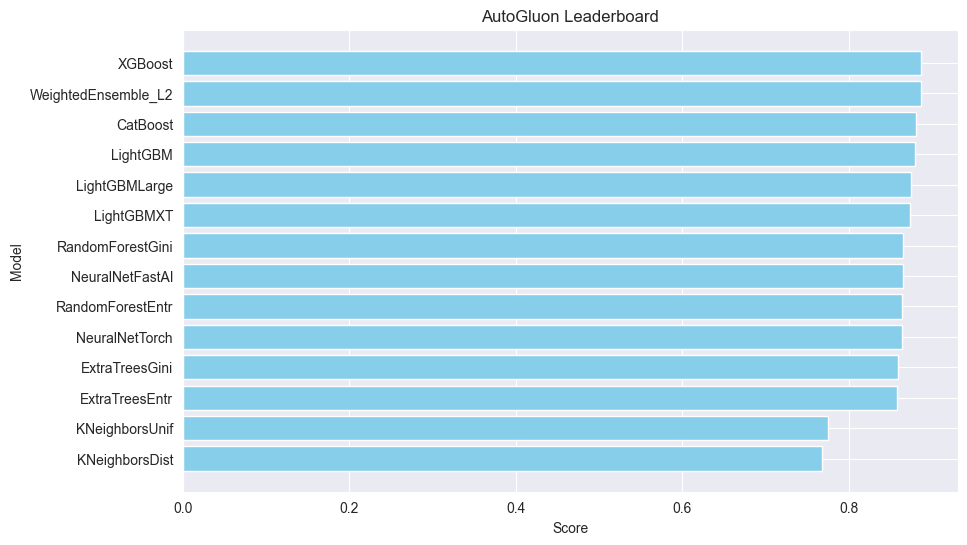

In [68]:
# 提取模型名称和性能指标
models = lboard['model']
scores = lboard['score_val']

# 创建条形图
plt.figure(figsize=(10, 6))
plt.barh(models, scores, color='skyblue')
plt.xlabel('Score')
plt.ylabel('Model')
plt.title('AutoGluon Leaderboard')
plt.gca().invert_yaxis()  # 反转 y 轴，让排名靠前的模型在顶部
plt.show()

## Conclusion

From the result we can find that XGBoost fit the data set best as a ratio of 0.8868. Weighted Ensemble_L2 holds the same score as XGBoost with longer time consume. So in the end We come to the conclusion that using XGBoost may best suitable for Adult Census Income Dataset.